# Theorectical maximal flux of strains

In [18]:
import cobra
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from cobra.io import read_sbml_model
import matplotlib as mlp


In [19]:
mlp.rcParams.update({'font.size': 14})

### Load models

In [20]:
sc_cyto_gpp = read_sbml_model("Data/sc_cyto_gpp_manipulated.xml")
sc_cyto_npp = read_sbml_model("Data/sc_cyto_npp_manipulated.xml")
sc_perox = read_sbml_model("Data/sc_perox_manipulated.xml")

yl_cyto = read_sbml_model("Data/yl_cyto_manipulated.xml")
yl_perox = read_sbml_model("Data/yl_perox_manipulated.xml")

'' is not a valid SBML 'SId'.
'' is not a valid SBML 'SId'.


### Calculate theoretical maximum for different strains

In [21]:
sc_cyto_gpp.objective = sc_cyto_gpp.reactions.get_by_id("r_apinene_con")
sc_cyto_gpp.objective = sc_cyto_npp.reactions.get_by_id("r_apinene_con")
sc_perox.objective = sc_perox.reactions.get_by_id("r_apinene_con")

yl_cyto.objective = yl_cyto.reactions.get_by_id("aPinene_ex")
yl_perox.objective = yl_perox.reactions.get_by_id("r_apinene_con")

In [22]:
sc_cyto_gpp_solution = sc_cyto_gpp.optimize()
sc_cyto_npp_solution = sc_cyto_npp.optimize()
sc_perox_solution = sc_perox.optimize()

yl_cyto_solution = yl_cyto.optimize()
yl_perox_solution = yl_perox.optimize()

### Plot results

In [42]:
x = ["$\it{S. cerivisiae}$ cytosol - GPP", 
"$\it{S. cerivisiae}$ cytosol - NPP",
"$\it{S. cerivisiae}$ - peroxisome",
"$\it{Y. lipolytica}$ - cytosol",
"$\it{Y. lipolytica}$ - peroxisome" 
]

aPineneFluxes = list()
aPineneFluxes.append(sc_cyto_gpp_solution.objective_value)
aPineneFluxes.append(sc_cyto_npp_solution.objective_value)
aPineneFluxes.append(sc_perox_solution.objective_value)
aPineneFluxes.append(yl_cyto_solution.objective_value)
aPineneFluxes.append(yl_perox_solution.objective_value)

/var/folders/xs/vrddmfd15j57vypcclv_l1_w0000gn/T/ipykernel_5485/1968811049.py:14: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(x, rotation=45, ha="right")


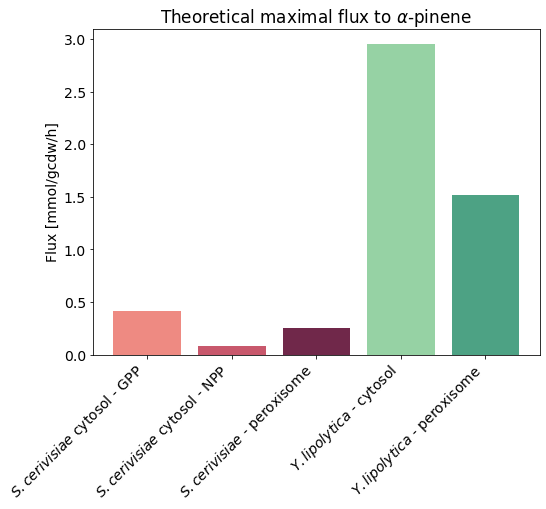

In [43]:
fig = plt.figure(figsize=(8,6))
ax = fig.add_subplot()

colors = [
    "#ee8a82",
    "#c8586c",
    "#70284a",
    "#96d2a4",
    "#4da284"
]

ax.bar(x, aPineneFluxes, color=colors)

ax.set_xticklabels(x, rotation=45, ha="right")
ax.set_ylabel("Flux [mmol/gcdw/h]")
ax.set_title(r"Theoretical maximal flux to $\alpha$-pinene")
plt.savefig("Theoretical_maximal_aPinene_flux", dpi=600, bbox_inches="tight")

In [25]:
biomassFlux = list()

biomassFlux.append(sc_cyto_gpp_solution.get_primal_by_id("r_2111"))
biomassFlux.append(sc_cyto_npp_solution.get_primal_by_id("r_2111"))
biomassFlux.append(sc_perox_solution.get_primal_by_id("r_2111"))
biomassFlux.append(yl_cyto_solution.get_primal_by_id("Biomass_Climit"))
biomassFlux.append(yl_perox_solution.get_primal_by_id("Biomass_Climit"))

/var/folders/xs/vrddmfd15j57vypcclv_l1_w0000gn/T/ipykernel_5485/3248568885.py:14: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(x, rotation=45, ha="right")


Text(0.5, 1.0, 'Biomass flux with Alpha-pinene production as objective')

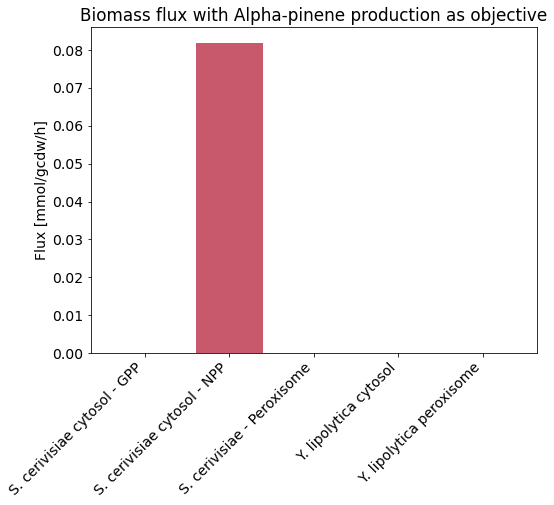

In [26]:
fig = plt.figure(figsize=(8,6))
ax = fig.add_subplot()

colors = [
    "#ee8a82",
    "#c8586c",
    "#70284a",
    "#96d2a4",
    "#4da284"
]

ax.bar(x, biomassFlux, color=colors)

ax.set_xticklabels(x, rotation=45, ha="right")
ax.set_ylabel("Flux [mmol/gcdw/h]")
ax.set_title("Biomass flux with Alpha-pinene production as objective")